## Zahid Nur Al Azami
### 16/394104/PA/17195

In [0]:
#import library 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from random import seed
from random import random

In [0]:
#load dataset
colname=['x1','x2','x3','x4','iris']
iris = pd.read_csv('iris.csv')
iris.columns = colname

In [4]:
iris.head()

,x1,x2,x3,x4,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.dtypes

x1      float64
x2      float64
x3      float64
x4      float64
iris     object
dtype: object

In [0]:
#replace class to 0, 1, 2
iris['iris']= iris.iris.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0.0,1.0,2.0])

In [7]:
iris.head()

,x1,x2,x3,x4,iris
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
#change to matrix
irismatrix = iris.as_matrix()
seed(10)
#shuffle data
data = irismatrix.tolist()
np.random.shuffle(data)

In [9]:
#data randomization 
data[0:10]

[[7.0, 3.2, 4.7, 1.4, 1.0],
 [4.9, 2.5, 4.5, 1.7, 2.0],
 [4.3, 3.0, 1.1, 0.1, 0.0],
 [5.8, 2.7, 5.1, 1.9, 2.0],
 [5.0, 3.4, 1.6, 0.4, 0.0],
 [5.7, 2.6, 3.5, 1.0, 1.0],
 [6.4, 3.2, 4.5, 1.5, 1.0],
 [6.1, 3.0, 4.9, 1.8, 2.0],
 [6.5, 3.0, 5.2, 2.0, 2.0],
 [4.9, 3.1, 1.5, 0.1, 0.0]]

## Iris Dataset Visualization

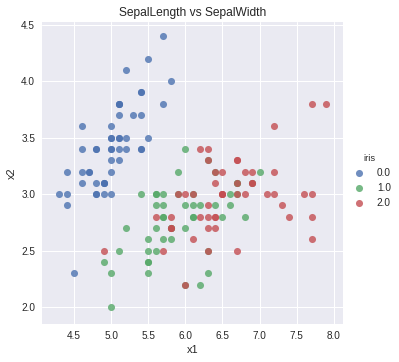

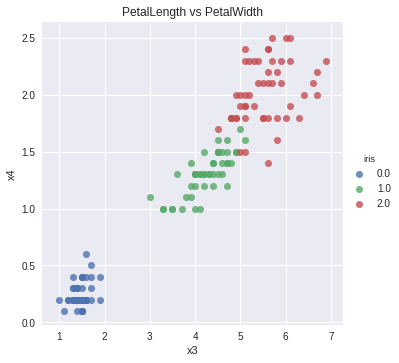

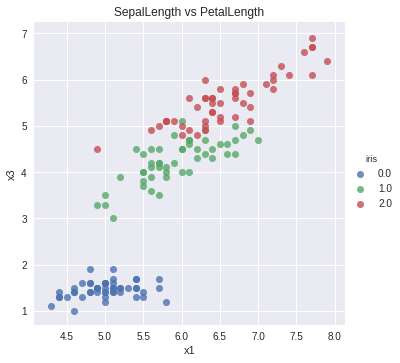

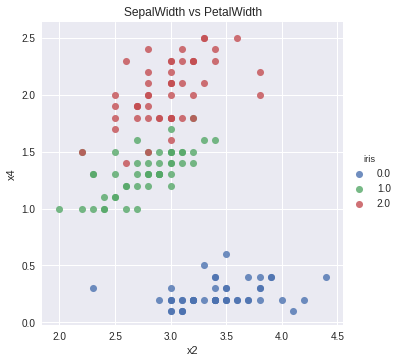

In [10]:
#Iris Dataset Visualization 

sns.lmplot('x1', 'x2',
           data=iris,
           fit_reg=False,
           hue="iris",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

sns.lmplot('x3', 'x4',
           data=iris,
           fit_reg=False,
           hue="iris",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('PetalLength vs PetalWidth')

sns.lmplot('x1', 'x3',
           data=iris,
           fit_reg=False,
           hue="iris",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs PetalLength')

sns.lmplot('x2', 'x4',
           data=iris,
           fit_reg=False,
           hue="iris",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalWidth vs PetalWidth')
plt.show()

## Definition of Function

In [0]:
# Result per Neuron
def calcresult(weight, theta):
  result = weight[-1]
  for i in range(len(weight)-1):
    result += weight[i] * theta[i]
  return result

#Sigmoid Activation Function
def activation(x):
  return 1/(1+np.exp(-x))

#Function for Calculating Deltas
def delta(output):
	return output * (1.0 - output)

#loss function (error) = 1/2(pred-actual)^2
def er(actual, predicted):
	error = 1/2*(predicted - actual)**2
	return error

#prediction 
def pred(activation):    
  if activation >= 0.5:
    prediction = 1.0
  else: 
    prediction = 0.0
  return prediction  
    
# Weight Inisialization
def inisialisasi(nInput, nHidden, nOut):
  net = list()
  hiddenlayer = [{'w':[random() for i in range(nInput + 1)]} for i in range(nHidden)]
  outputlayer = [{'w':[random() for i in range(nHidden + 1)]} for i in range(nOut)]
  net.append(hiddenlayer)
  net.append(outputlayer)
  return net

# Feedforward from input to output
def feedforward(net, row):
	inputs = row
	for layer in net:
		nextinput = []
		for n in layer:
			result = calcresult(n['w'], inputs)
			n['out'] = activation(result)
			nextinput.append(n['out'])
		inputs = nextinput
	return inputs

# Backpropagation 
def backprop(network, target):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
    #hidden layer
		if i != len(network)-1:
			for j in range(len(layer)):
				e = 0.0
				for n in network[i + 1]:
					e += (n['w'][j] * n['delta'])
				errors.append(e)
		else:
      #layer output, change the error to target-prediction 
			for j in range(len(layer)):
				n = layer[j]
				errors.append(target[j] - n['out'])
		for j in range(len(layer)):
      #delta= target-prediksi * 1-prediksi*prediksi 
			n = layer[j]
			n['delta'] = errors[j] * delta(n['out'])
      
#Update Weight 
def updateweight(network, row, lr):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['out'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
        #update weight w = w + lr *dtheta 
        # dtheta = delta * input  
				neuron['w'][j] += lr * neuron['delta'] * inputs[j]
      #bias 
			neuron['w'][-1] += lr * neuron['delta']

#Function to calculate accuracy      
def accuracymetric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual))

In [0]:
#Function for Training Network

def trainnetwork(network, train, lr, epoch, n_out):
  #errr = []
  for ep in range(epoch):
    bener = 0
    sumerror = 0 
    exp=[]
    pred=[]
    for row in train:
      outputs = feedforward(network, row)
      expected = [0 for i in range(n_out)]
      #One Hot Encodingnya
      expected[int(row[-1])] = 1
      sumerror += sum([er(expected[i],(outputs[i]))  for i in range(len(expected))])
      backprop(network, expected)
      updateweight(network, row, lr)
      
      #Make a prediction from the result of activation
      for i in range(len(expected)):
        if outputs[i] >=0.5: 
          outputs[i]=1
        else: outputs[i]=0
      
      if (expected == outputs) :
        bener +=1
       
    errr.append(sumerror/len(train))
    
    acc.append(bener/len(train))
  #print(errr)
  
  #print(acc)

## Training and Validation

In [0]:
#Split dataset 70% training, 30% validasi 
total=len(data)
lentrain=int(0.7*total)
lenval=int(0.3*total)

train = data[:lentrain]
val = data[lentrain:]

#### Learning Rate 0.1

In [52]:
# Training backprop algorithm
errr=[]
acc=[]
seed(8080)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 2, n_outputs)
trainnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [-0.90210269404169, -1.6625799900425022, 3.2219701418831295, 1.7914084205911054, -0.163622230422876], 'out': 0.9999909568917134, 'delta': -3.2250423322483366e-07}, {'w': [-4.25353967250501, -2.882550357108625, 5.276835701181799, 7.042523899523534, -3.9509271406651973], 'out': 0.9971301217569843, 'delta': 0.00022064285520508232}]
[{'w': [-6.6042269758299845, -1.271186056632121, 3.201729391977599], 'out': 0.009285703911392386, 'delta': -8.542364383693031e-05}, {'w': [6.081897669653756, -5.417787394650425, -3.008982302492419], 'out': 0.08889332755597985, 'delta': -0.007199586504280051}, {'w': [1.1139636562421225, 5.592115477734014, -4.327480086472236], 'out': 0.9137656590352325, 'delta': 0.00679509182318507}]


In [0]:
#Function for Training Network

def valnetwork(network, val, lr, epoch, n_out):
  #errr = []
  for ep in range(epoch):
    bener = 0
    sumerror = 0 
    exp=[]
    pred=[]
    for row in train:
      outputs = feedforward(network, row)
      expected = [0 for i in range(n_out)]
      #One Hot Encoding
      expected[int(row[-1])] = 1
      sumerror += sum([er(expected[i],(outputs[i]))  for i in range(len(expected))])
      backprop(network, expected)
      
      #Make a prediction from the result of activation
      for i in range(len(expected)):
        if outputs[i] >=0.5: 
          outputs[i]=1
        else: outputs[i]=0
      
      if (expected == outputs) :
        bener +=1
       
    errval.append(sumerror/len(train))
    
    accval.append(bener/len(train))
  print(errval)
  
  print(accval)

In [54]:
# Validation of backprop algorithm
errval=[]
accval=[]
seed(8080)
dataset = val
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

#network = inisialisasi(n_inputs, 2, n_outputs)
valnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851, 0.0380533958316851,

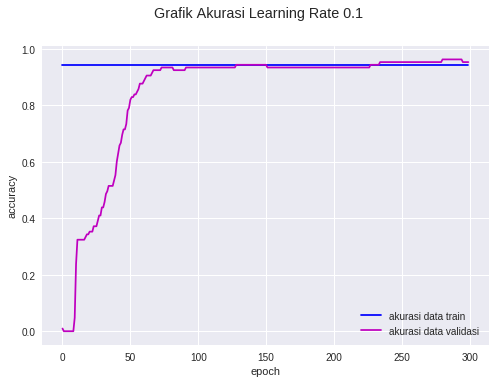

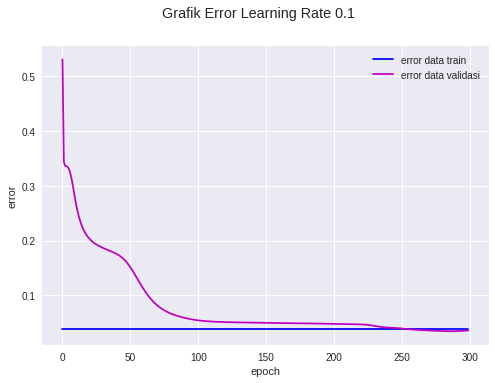

In [55]:
  #accuracy graphic 
  x=plt.figure()
  plt.suptitle('Accuracy Graphic Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(accval,'-b')
  plt.plot(acc,'-m')
  plt.gca().legend(('accuracy of data train','accuracy of data validation'))
  y=plt.figure()
  
  #error graphic 
  y.suptitle('Error Graphic Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(errval,'-b')
  plt.plot(errr,'-m')  
  plt.gca().legend(('error of data train','error of data validation'))
  

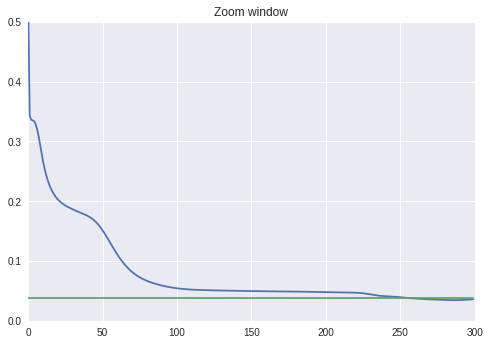

In [56]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,0.5), autoscale_on=False,
           title='Error 0.1')
axzoom.plot(errr)
axzoom.plot(errval)

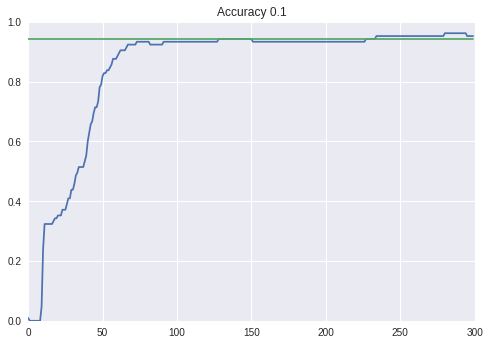

In [58]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,1), autoscale_on=False,
           title='Accuracy 0.1')
axzoom.plot(acc)
axzoom.plot(accval)

#### Learning Rate 0.8

In [59]:
# Training backprop algorithm
errr=[]
acc=[]
seed(8080)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 2, n_outputs)
trainnetwork(network, dataset, 0.8, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [-0.8956695550390001, -2.123270164380069, 4.0595861649031235, 2.1520290683412835, -0.23727262604826987], 'out': 0.9999998694003192, 'delta': -6.250669988417548e-09}, {'w': [-19.992070165619094, -14.745606161317328, 22.526723116162444, 33.7375476748539, -16.29496905026717], 'out': 0.9999994411317544, 'delta': 5.2605486086498445e-08}]
[{'w': [-8.797467614800306, -2.234089561846205, 4.304893302867322], 'out': 0.0011970969576524215, 'delta': -1.4313256368485332e-06}, {'w': [7.10281943947916, -5.010630601596195, -4.286295755815738], 'out': 0.1023351867792975, 'delta': -0.00940078618658581}, {'w': [2.0314147615992852, 5.032086344410498, -4.867673133303896], 'out': 0.8978289520257869, 'delta': 0.009372367337006086}]


In [66]:
# Validation of backprop algorithm
errval=[]
accval=[]
seed(8080)
dataset = val
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

#network = inisialisasi(n_inputs, 2, n_outputs)
valnetwork(network, dataset, 0.8, 300, n_outputs)
for layer in network:
	print(layer)

[0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.16921922848831406, 0.1692192284

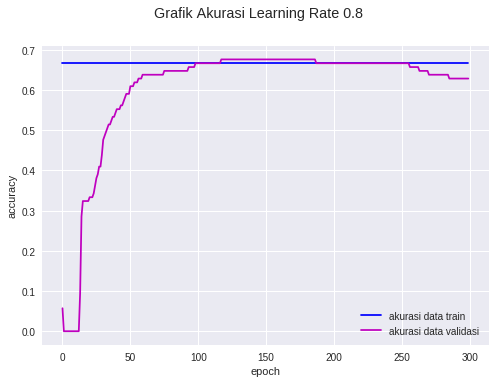

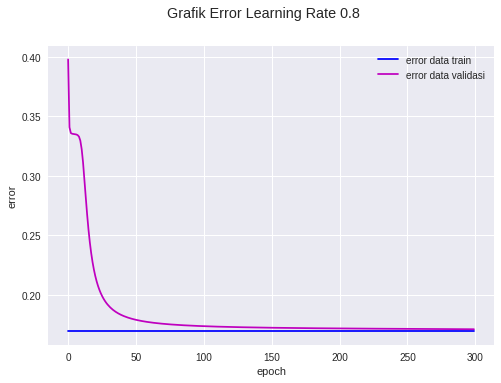

In [68]:
  #accuracy graphic
  x=plt.figure()
  plt.suptitle('Accuracy Graphic Learning Rate 0.8')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(accval,'-b')
  plt.plot(acc,'-m')
  plt.gca().legend(('accuracy of data train','accuracy of data validation'))
  y=plt.figure()
  
  #error graphic 
  y.suptitle('Error Graphic Learning Rate 0.8')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(errval,'-b')
  plt.plot(errr,'-m')  
  plt.gca().legend(('error of data train','error of data validation'))
  

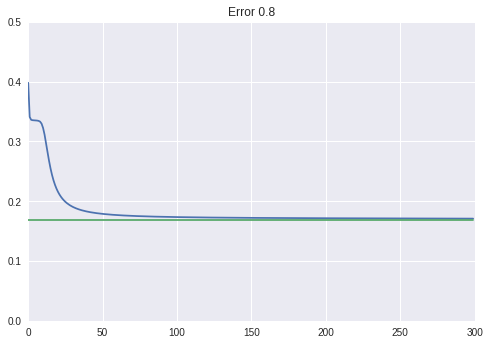

In [69]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,0.5), autoscale_on=False,
           title='Error 0.8')
axzoom.plot(errr)
axzoom.plot(errval)

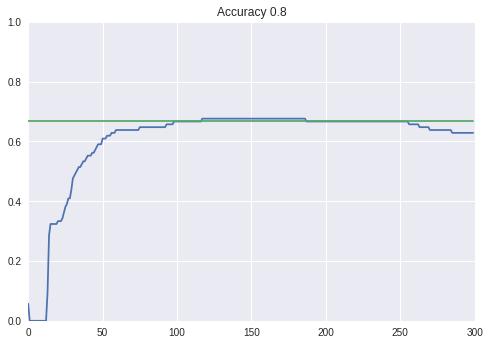

In [70]:
axzoom = plt.subplot(111)
axzoom.set(xlim=(0, 300), ylim=(0,1), autoscale_on=False,
           title='Accuracy 0.8')
axzoom.plot(acc)
axzoom.plot(accval)

## The Number of Other Hidden Neurons

In [76]:
# Training backprop algorithm
errr=[]
acc=[]
seed(8080)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 3, n_outputs)
trainnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [-0.4920324961771545, -1.5865814095381328, 1.286372639110163, 1.836061432198134, -0.2869663609633067], 'out': 0.9569417191250627, 'delta': 0.016994017425042727}, {'w': [0.5769502414827106, 0.7837053979638697, 0.8272530652938188, 0.08656473528005654, 0.14308690166044338], 'out': 0.9999867685809621, 'delta': -1.4585565845047397e-06}, {'w': [0.5981091209571513, 0.4860072816225238, 1.0126557719282152, 0.4833992749188528, 0.552738848893669], 'out': 0.9999973351376917, 'delta': -4.0135762149387e-07}]
[{'w': [-8.502507649001585, 0.9946181011970949, 0.7097492710593546, 0.5733332029572558], 'out': 0.0028467808789660338, 'delta': -8.08109060121035e-06}, {'w': [1.0865553401687762, -0.4308259592233977, 0.0074222835252356015, -0.5928111233478301], 'out': 0.5185549306776868, 'delta': -0.1294602017504912}, {'w': [8.109574736906085, -2.393913002936272, -2.154930975863634, -2.414601176330911], 'out': 0.68355993973952, 'delta': 0.06844780409725058}]


In [77]:
# Validation of backprop algorithm
errval=[]
accval=[]
seed(8080)
dataset = val
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

#network = inisialisasi(n_inputs, 1, n_outputs)
valnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.14907099263154866, 0.1490709926

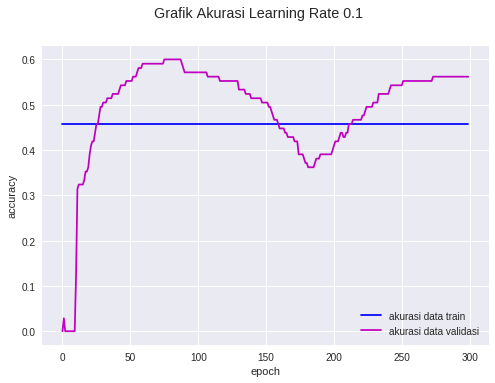

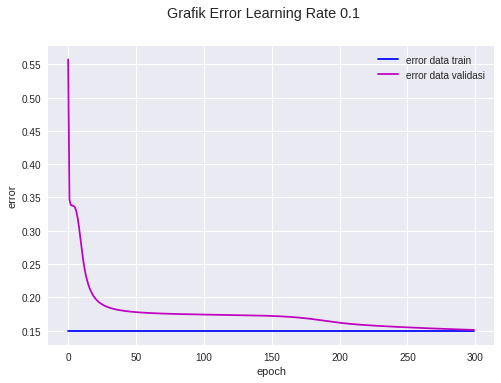

In [78]:
  #accuracy graphic 
  x=plt.figure()
  plt.suptitle('Accuracy Graphic Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(accval,'-b')
  plt.plot(acc,'-m')
  plt.gca().legend(('accuracy of data train','accuracy of data validation'))
  y=plt.figure()
  
  #grafik error 
  y.suptitle('Error Graphic Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(errval,'-b')
  plt.plot(errr,'-m')  
  plt.gca().legend(('error of data train','error of data validation'))
  

In [82]:
#Another Initial Weight
#Training backprop algorithm
errr=[]
acc=[]
seed(800)
dataset = train
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

network = inisialisasi(n_inputs, 3, n_outputs)
trainnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[{'w': [0.7379729445684597, 0.9893901968307695, 0.07115306474235908, 0.455287893987392, 0.5238932003541874], 'out': 0.9999389213041963, 'delta': -8.51721867852752e-06}, {'w': [-0.4789384254694159, -1.9015512506750476, 1.3640709952853893, 1.804351071539094, 0.2705996172548459], 'out': 0.9607012983078975, 'delta': 0.015161266989032016}, {'w': [0.5550099346933657, 0.8779629962107218, 0.2847328398186094, 0.14970726903348783, 0.30837434473959124], 'out': 0.9998027257673284, 'delta': -9.267916796637365e-06}]
[{'w': [1.1777645931079908, -8.313779339056435, 0.35673759490730134, 0.7726133850859855], 'out': 0.0034016717043969706, 'delta': -1.1532008381276957e-05}, {'w': [-0.031705540406678806, 1.1411869386831506, -0.7796698336718638, -0.23810807840466802], 'out': 0.5245619333857854, 'delta': -0.13082402112691324}, {'w': [-1.9988423432094724, 7.817079004035517, -2.075124811596181, -2.67004056693663], 'out': 0.6767024148854235, 'delta': 0.07072983543067117}]


In [83]:
#Validation of backprop algorithm
errval=[]
accval=[]
seed(800)
dataset = val
n_inputs = len(dataset[0]) - 1

n_outputs = len(set([row[-1] for row in dataset]))

#network = inisialisasi(n_inputs, 1, n_outputs)
valnetwork(network, dataset, 0.1, 300, n_outputs)
for layer in network:
	print(layer)

[0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.15038266084755647, 0.1503826608

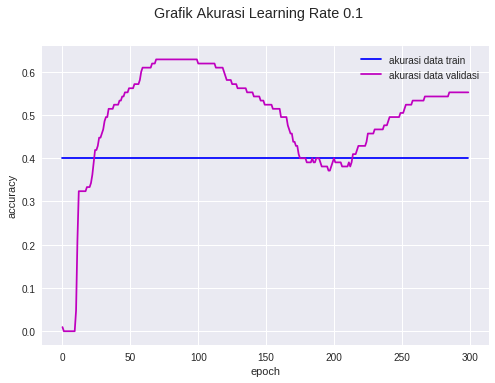

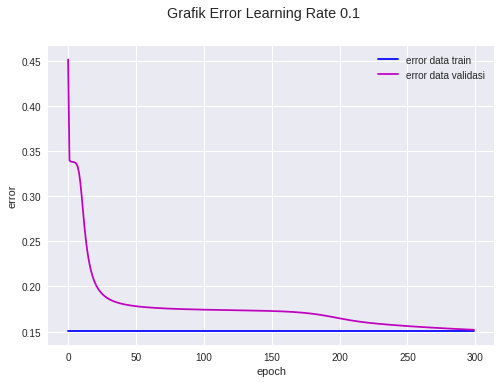

In [84]:
  #accuracy graphic 
  x=plt.figure()
  plt.suptitle('Accuracy Graphic Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(accval,'-b')
  plt.plot(acc,'-m')
  plt.gca().legend(('accuracy of data train','accuracy of data validation'))
  y=plt.figure()
  
  #error graphic 
  y.suptitle('Error Graphic Learning Rate 0.1')
  plt.xlabel('epoch')
  plt.ylabel('error')
  plt.plot(errval,'-b')
  plt.plot(errr,'-m')  
  plt.gca().legend(('error of data train','error of data validation'))
  